# Malaria detection using VGG19 Transfer learning technique

In [1]:
# import necessary libraries
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [2]:
dataset=os.path.join(os.path.abspath(''),r"dataset")

In [3]:
noOfInfectedSamples=len(os.listdir(os.path.join(dataset,r"Infected")))
noOfUninfectedSamples= len(os.listdir(os.path.join(dataset,r"Uninfected")))

# Data Visualisation

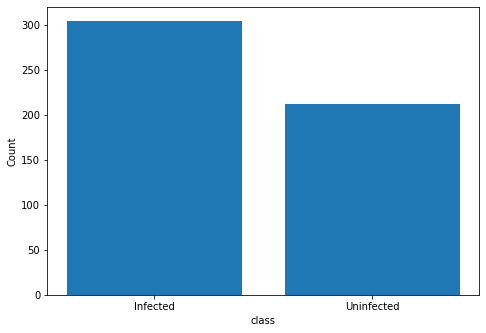

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # each bar dimension
classification=["Infected", "Uninfected"]
noOfSamples=[noOfInfectedSamples, noOfUninfectedSamples ]
plt.ylabel("Count")
plt.xlabel("class")
ax.bar(classification,noOfSamples)
plt.show()



# Data Preprocessing

In [5]:
images=[]
classes=[]

In [6]:
os.listdir(dataset)

['Infected', 'Uninfected']

In [7]:
for dirs in os.listdir(dataset):
    imagepath=os.path.join(dataset,dirs)
    for im in os.listdir(imagepath):
        img=cv2.imread(os.path.join(imagepath,im))
        img=cv2.resize(img,(224,224))
        img=img/255
        images.append(img)
        classes.append(dirs)

In [8]:
X=np.array(images)

In [9]:
X.shape

(517, 224, 224, 3)

In [10]:

Y=np.array(classes)

In [11]:
Y.shape

(517,)

# Create Hold out environment

In [12]:

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)


In [13]:
X_train.shape

(413, 224, 224, 3)

In [14]:
Y_train

array(['Uninfected', 'Infected', 'Infected', 'Uninfected', 'Infected',
       'Uninfected', 'Uninfected', 'Uninfected', 'Infected', 'Uninfected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Uninfected',
       'Infected', 'Uninfected', 'Infected', 'Uninfected', 'Uninfected',
       'Infected', 'Infected', 'Uninfected', 'Infected', 'Infected',
       'Infected', 'Uninfected', 'Uninfected', 'Infected', 'Uninfected',
       'Uninfected', 'Infected', 'Uninfected', 'Infected', 'Uninfected',
       'Infected', 'Infected', 'Uninfected', 'Uninfected', 'Infected',
       'Infected', 'Uninfected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Uninfected', 'Uninfected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Uninfected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Uninfected', 'Uninfected', 'Uninfected',
       'Infected', 'Infected', 'Uninfected', 'Uninfected', 'Infected',
       'Uninfected', 'Uninfected', 'Infected', 'Uninfected', 'Uninfected'

In [15]:
outputtobeclassified=len(os.listdir(dataset))

# One Hot Encoding

In [16]:
y_train=pandas.get_dummies(Y_train)
y_test=pandas.get_dummies(Y_test)

In [17]:
y_test

,Infected,Uninfected
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
99,0,1
100,1,0
101,1,0
102,1,0


In [18]:
# For Reference

In [25]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 333s 1us/step


In [26]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# VGG19 Model Initialisation

In [19]:
IMAGE_SIZE=[224,224]
VGG19_init = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in VGG19_init.layers:
    layer.trainable = False

In [21]:

layer = Flatten()(VGG19_init.output)
prediction = Dense(outputtobeclassified, activation='sigmoid')(layer)
model = Model(inputs=VGG19_init.input, outputs=prediction)

In [22]:

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Image Augumentation

In [24]:
dataGen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.2,
                          rotation_range=10,
                          horizontal_flip = True)

In [25]:
modelTraining=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=10),
                                steps_per_epoch=41,
                                epochs=10,
                            validation_data=(X_test,y_test),
                            shuffle=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
41/41 [==============================] - 133s 3s/step - loss: 0.8213 - accuracy: 0.5831 - val_loss: 0.5894 - val_accuracy: 0.6731
Epoch 2/10
41/41 [==============================] - 133s 3s/step - loss: 0.4826 - accuracy: 0.7717 - val_loss: 0.4253 - val_accuracy: 0.7788
Epoch 3/10
41/41 [==============================] - 134s 3s/step - loss: 0.4291 - accuracy: 0.8015 - val_loss: 0.3479 - val_accuracy: 0.9135
Epoch 4/10
41/41 [==============================] - 133s 3s/step - loss: 0.3376 - accuracy: 0.8586 - val_loss: 0.3299 - val_accuracy: 0.8846
Epoch 5/10
41/41 [==============================] - 134s 3s/step - loss: 0.3696 - accuracy: 0.8238 - val_loss: 0.4032 - val_accuracy: 0.7981
Epoch 6/10
41/41 [==============================] - 136s 3s/step - loss: 0.3655 - accuracy: 0.8263 - val_loss: 0.2952 - val_accuracy: 0.9327
Epoch 7/10
41/41 [==============================] - 134s 3s/step - loss: 0.308

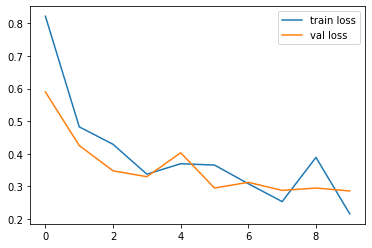

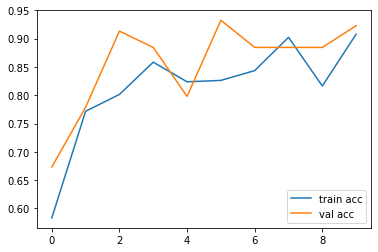

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(modelTraining.history['loss'], label='train loss')
plt.plot(modelTraining.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(modelTraining.history['accuracy'], label='train acc')
plt.plot(modelTraining.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Verify Model Accuracy

In [29]:
score=model.evaluate(X_test, y_test, verbose=0)

print("Test_score = ",score[0])
print("Test_accuracy = ",score[1])

Test_score =  0.286220908164978
Test_accuracy =  0.9230769276618958


# Save Trained Model

In [28]:
model.save('Malaria-Detection-VGG19.h5')

# Evaluate Model

In [32]:
testModel=load_model('Malaria-Detection-VGG19.h5')

In [64]:
imOriginal=os.path.join(os.path.abspath(''),r"test\C241NThinF_IMG_20151207_124358_cell_91.png")
img=cv2.imread(imOriginal)
img=cv2.resize(img,(224,224))
img=img/255
img=np.array(img)


In [65]:
img.shape

(224, 224, 3)

In [66]:
img=np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [67]:
predictedvalue=np.argmax(testModel.predict(img), axis=1)

In [68]:
if(predictedvalue==0):
    print("Infected")
else:
    print("Uninfected")

Uninfected
